In [1]:
import numpy as np
from util import XYZ
from env import CollisionCheckingEnvironment, plt, np
from SearchBasedPlanner import Astar
from SampleBasedPlanner import PRM, RRT, RRTstar

3.900683488687417


100%|██████████| 1000/1000 [00:02<00:00, 357.99it/s]


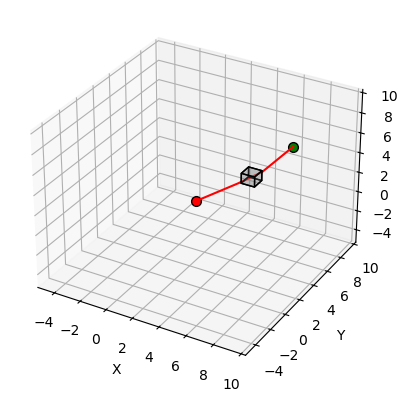

In [2]:
start_and_goal = {
    "single_cube": (XYZ(2.3, 2.3, 1.3), XYZ(7.0, 7.0, 5.5)),
    "maze": (XYZ(0.0, 0.0, 1), XYZ(12, 12, 5)),
    "window": (XYZ(2.0, -4.9, 2.0), XYZ(6.0, 18.0, 3.0)),
    "tower": (XYZ(2.5, 4.0, 0.5), XYZ(4.0, 2.5, 19.5)),
    "flappy_bird": (XYZ(0.5, 2.5, 5.5), XYZ(19.0, 2.5, 5.5)),
    "room": (XYZ(1.0, 5.0, 1.5), XYZ(9.0, 7.0, 1.5)),
    "monza": (XYZ(0.5, 1.0, 4.9), XYZ(3.8, 1.0, 0.1))
}


f = "single_cube"
env = CollisionCheckingEnvironment(f'./maps/{f}.txt', discretize_scale=0)
start, goal = start_and_goal[f]
# planner = PRM(start, goal, env)
planner = RRTstar(start, goal, env, n = 1_000)
print(planner.radius)
planner.sample()
# cProfile.run('planner.sample()', 'profile_output')
# p = pstats.Stats('profile_output')
# p.sort_stats('tottime').print_stats(10)  # Sort by tottime time and print top 10 functions

path = planner.build_path()
np.save(f'./maps/{f}_', path)
fig, ax, hb = env.draw_map(start, goal)    
ax.plot(path[:,0],path[:,1],path[:,2],'r-')
plt.show(block=True)